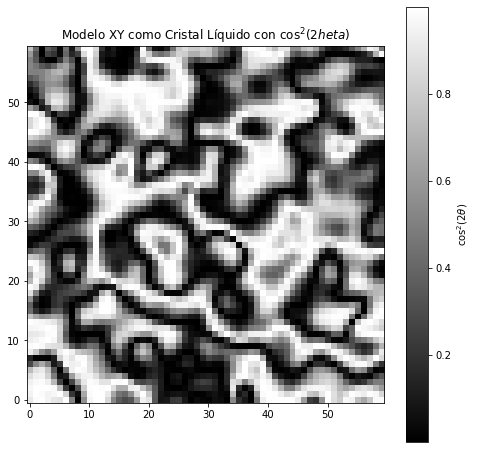

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Cargar y normalizar la configuración
def load_and_normalize_config(file_path):
    config = np.loadtxt(file_path)
    config = np.mod(config, 2 * np.pi)
    return config

# Interpolar la configuración usando un filtro gaussiano
def interpolate_config(config, L, sigma=1.35):
    config_x = np.cos(config)
    config_y = np.sin(config)
    smooth_x = gaussian_filter(config_x, sigma=sigma)
    smooth_y = gaussian_filter(config_y, sigma=sigma)
    smooth_config = np.arctan2(smooth_y, smooth_x)
    return smooth_config

# Calcular cos^2(2*theta)
def calculate_cos2_2theta(config):
    return np.cos(2 * config) ** 2

# Plotear la configuración suavizada
def plot_smoothed_configuration(config, L, title=''):
    smoothed_config = interpolate_config(config, L)
    cos2_2theta = calculate_cos2_2theta(smoothed_config)

    plt.figure(figsize=(8, 8))
    plt.imshow(cos2_2theta, cmap='gray', origin='lower')
    plt.colorbar(label=r'$\cos^2(2\theta)$')
    plt.title(title)
    plt.savefig('cristalliquido_cos2_2theta.pdf')
    plt.show()

def main():
    L = 60
    config_file = 'C:\\Users\\Usuario\\OneDrive\\Escritorio\\Cosas TFG\\confbuenaL=60\\configatT=08400.data'  # Cambia esta ruta según sea necesario

    config = load_and_normalize_config(config_file)
    config = config.reshape(L, L)
    plot_smoothed_configuration(config, L, title='Modelo XY como Cristal Líquido con $\cos^2(2\theta)$')

main()


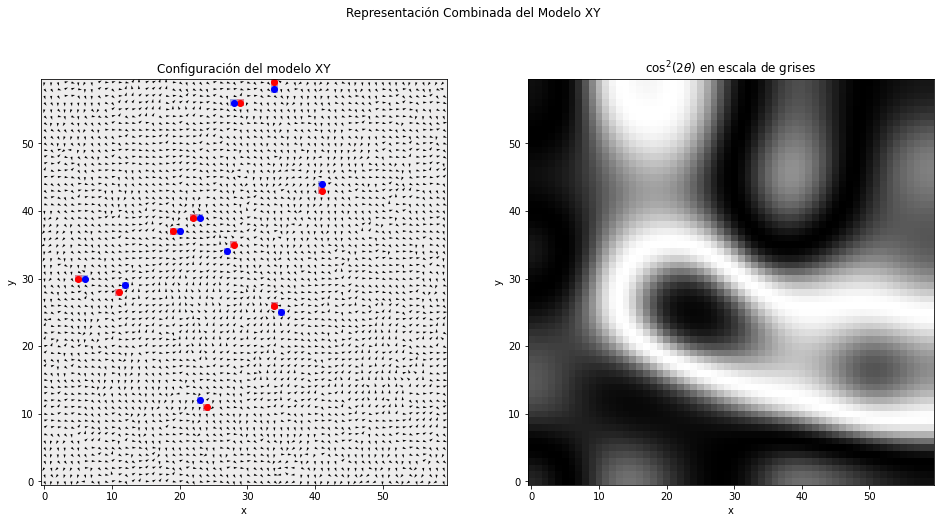

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Cargar y normalizar la configuración
def load_and_normalize_config(file_path):
    config = np.loadtxt(file_path)
    config = np.mod(config, 2 * np.pi)
    return config

# Interpolar la configuración usando un filtro gaussiano
def interpolate_config(config, L, sigma=1.0):
    config_x = np.cos(config)
    config_y = np.sin(config)
    smooth_x = gaussian_filter(config_x, sigma=sigma)
    smooth_y = gaussian_filter(config_y, sigma=sigma)
    smooth_config = np.arctan2(smooth_y, smooth_x)
    return smooth_config

# Calcular cos^2(2*theta)
def calculate_cos2_2theta(config):
    return np.cos(2 * config) ** 2

# Calcular la vorticidad de la configuración
def calculate_vorticity(config, L):
    tpi = 2 * np.pi
    vorticity_map = np.zeros((L, L))
    for i in range(L):
        for j in range(L):
            platt1 = config[i, j]
            platt1shiftX = config[(i+1) % L, j]
            platt1shiftY = config[i, (j+1) % L]
            platt1shiftXshiftY = config[(i+1) % L, (j+1) % L]

            platt1v = np.mod(platt1, tpi)
            platt1shiftXv = np.mod(platt1shiftX, tpi)
            platt1shiftXshiftYv = np.mod(platt1shiftXshiftY, tpi)
            platt1shiftYv = np.mod(platt1shiftY, tpi)
            diff_list1 = np.array([platt1v - platt1shiftXv, platt1shiftXv - platt1shiftXshiftYv, platt1shiftXshiftYv - platt1shiftYv, platt1shiftYv - platt1v])

            vort_here = 0.0
            for ll_1 in diff_list1:
                if ll_1 > np.pi:
                    ll_1 -= tpi
                if ll_1 < -np.pi:
                    ll_1 += tpi
                ll_1 /= tpi
                vort_here += ll_1

            vorticity_map[i, j] = vort_here
    return vorticity_map

# Plotear la configuración combinada
def plot_combined_configuration(config, L, title='', sigma=3.0):
    smoothed_config = interpolate_config(config, L, sigma=sigma)
    cos2_2theta = calculate_cos2_2theta(smoothed_config)
    vorticity = calculate_vorticity(config, L)

    fig, axs = plt.subplots(1, 2, figsize=(16, 8))

    # Subfigura 1: Representación del campo de espines con flechas y vórtices
    x, y = np.meshgrid(np.arange(L), np.arange(L))
    u = np.cos(config)
    v = np.sin(config)

    axs[0].quiver(x, y, u, v, color='k')
    axs[0].imshow(vorticity, cmap='coolwarm', alpha=0.5, origin='lower')
    axs[0].scatter(np.where(vorticity > 0.5)[1], np.where(vorticity > 0.5)[0], color='red')
    axs[0].scatter(np.where(vorticity < -0.5)[1], np.where(vorticity < -0.5)[0], color='blue')
    axs[0].set_title('Configuración del modelo XY')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('y')

    # Subfigura 2: Representación de cos^2(2*theta)
    axs[1].imshow(cos2_2theta, cmap='gray', origin='lower')
    axs[1].set_title(r'$\cos^2(2\theta)$ en escala de grises')
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('y')

    plt.suptitle(title)
    plt.savefig('combined_cristalliquido_vorticity.pdf')
    plt.show()

def main():
    L = 60
    config_file = 'C:\\Users\\Usuario\\OneDrive\\Escritorio\\Cosas TFG\\confbuenaL=60\\configatT=08400.data'  # Cambia esta ruta según sea necesario

    config = load_and_normalize_config(config_file)
    config = config.reshape(L, L)
    plot_combined_configuration(config, L, title='Representación Combinada del Modelo XY', sigma=6.0)

main()


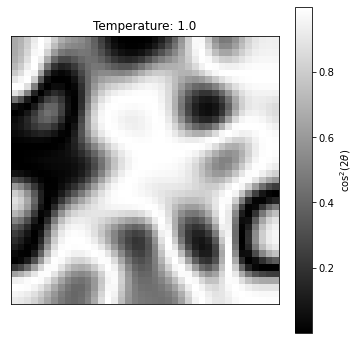

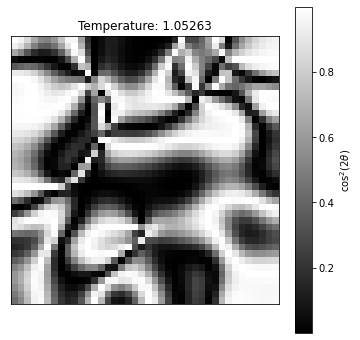

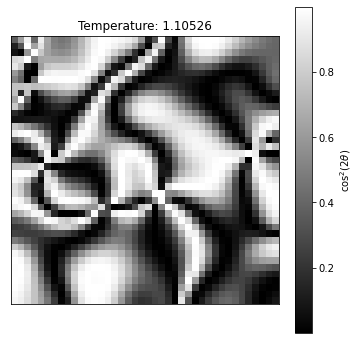

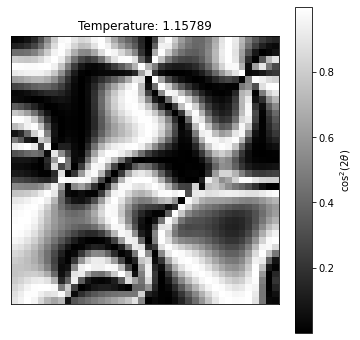

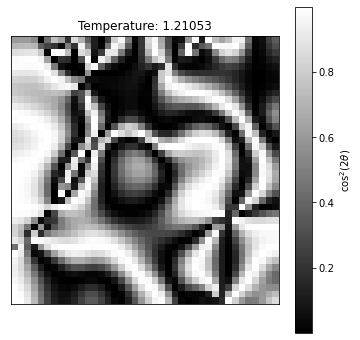

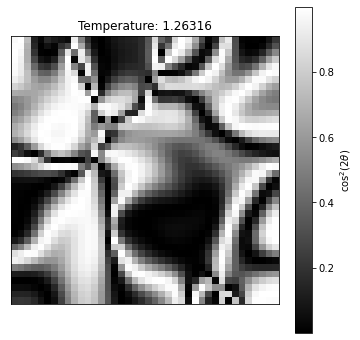

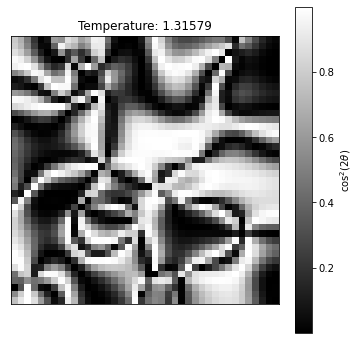

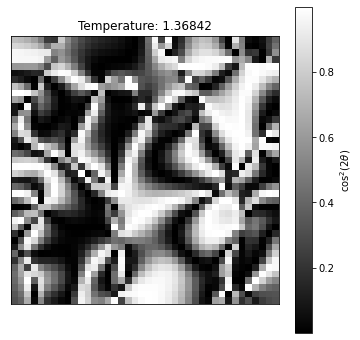

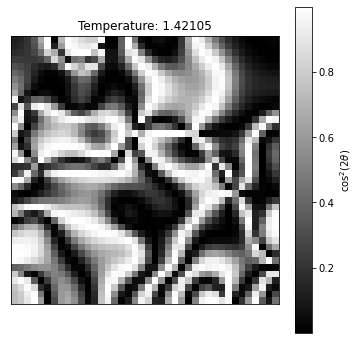

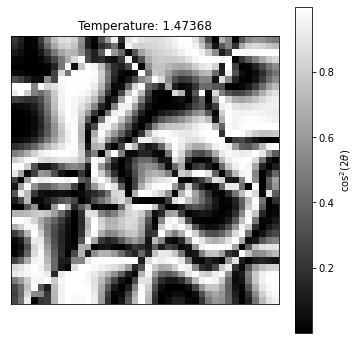

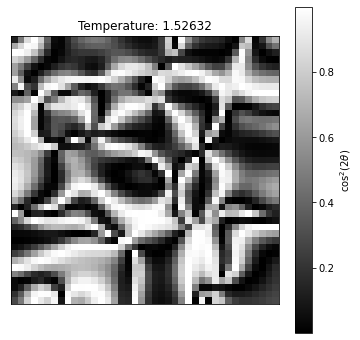

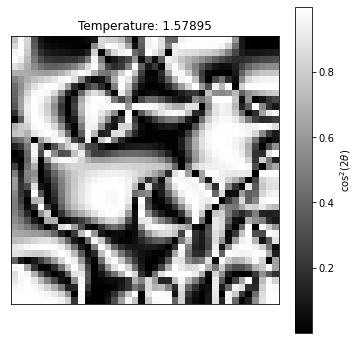

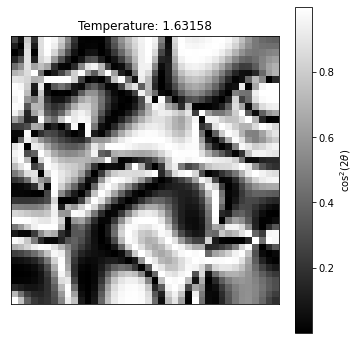

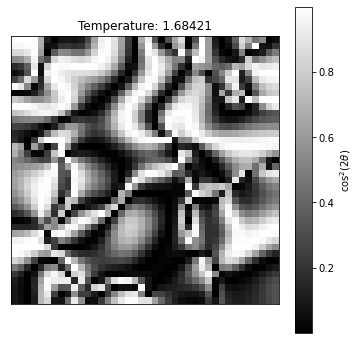

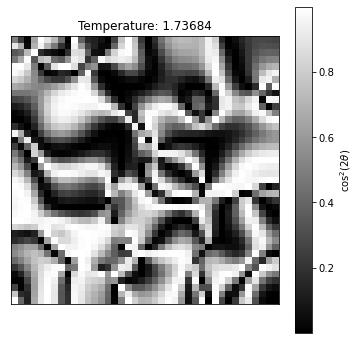

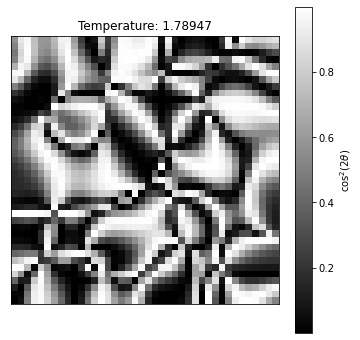

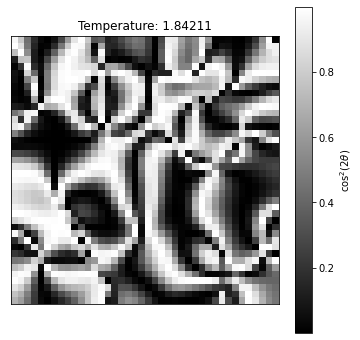

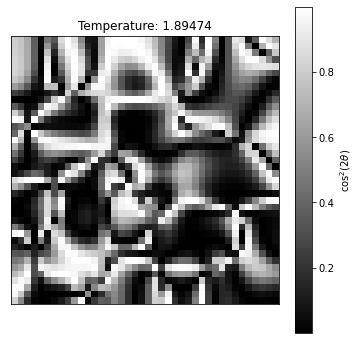

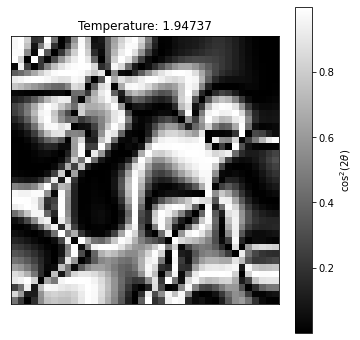

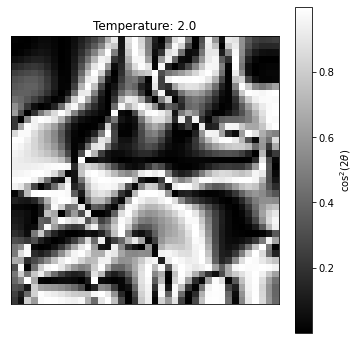

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import os

# Cargar y normalizar la configuración
def load_and_normalize_config(file_path):
    config = np.loadtxt(file_path)
    config = np.mod(config, 2 * np.pi)
    return config

# Cargar configuraciones desde un directorio
def load_configurations(directory, temperatures):
    configs = {}
    for temp in temperatures:
        temp_str = str(int(temp * 10000)).zfill(5)
        filename = os.path.join(directory, f'configatT={temp_str}.data')
        configs[temp] = load_and_normalize_config(filename)
    return configs

# Interpolar la configuración usando un filtro gaussiano
def interpolate_config(config, L, sigma=3.0):
    config_x = np.cos(config)
    config_y = np.sin(config)
    smooth_x = gaussian_filter(config_x, sigma=sigma)
    smooth_y = gaussian_filter(config_y, sigma=sigma)
    smooth_config = np.arctan2(smooth_y, smooth_x)
    return smooth_config

# Calcular cos^2(2*theta)
def calculate_cos2_2theta(config):
    return np.cos(2 * config) ** 2

# Plotear la configuración en escala de grises
def plot_cos2_2theta_configurations(configs, temperatures, L):
    for temp in temperatures:
        config = configs[temp].reshape(L, L)
        smoothed_config = interpolate_config(config, L)
        cos2_2theta = calculate_cos2_2theta(smoothed_config)

        plt.figure(figsize=(6, 6))
        plt.imshow(cos2_2theta, cmap='gray', origin='lower')
        plt.colorbar(label=r'$\cos^2(2\theta)$')
        plt.title(f'Temperature: {temp}')
        plt.xticks([])
        plt.yticks([])
        plt.savefig(f'cos2_2theta_temp_{int(temp*10000)}.pdf')
        plt.show()

# Cargar temperaturas desde el archivo de salida del procesamiento de datos
def load_temperatures(file_path):
    data = np.loadtxt(file_path)
    return data  # Suponiendo que las temperaturas están al final del archivo, después de los tres primeros valores

# Función principal en el notebook
def main():
    # Cargar el rango de temperaturas desde el archivo 'variables.data'
    temp_file_path = 'C:\\Users\\Usuario\\OneDrive\\Escritorio\\Cosas TFG\\transicionL=40\\variables.data'  # Cambia esta ruta según sea necesario
    temperatures = load_temperatures(temp_file_path)
    L = 40

    dir1 = 'C:\\Users\\Usuario\\OneDrive\\Escritorio\\Cosas TFG\\transicionL=40'

    configs = load_configurations(dir1, temperatures)

    plot_cos2_2theta_configurations(configs, temperatures, L)

# Ejecutar la función principal en el notebook
main()


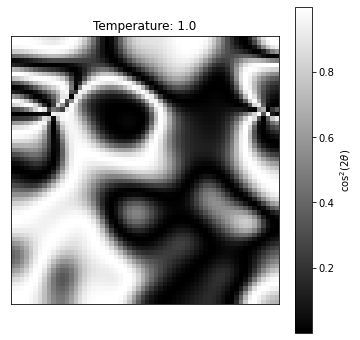

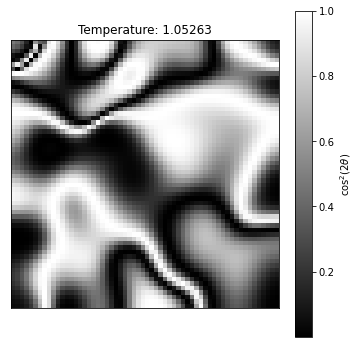

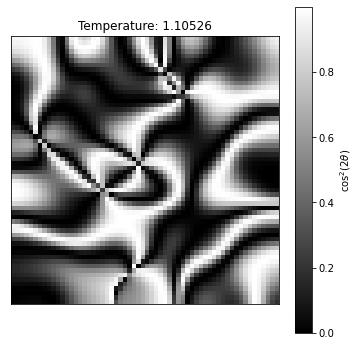

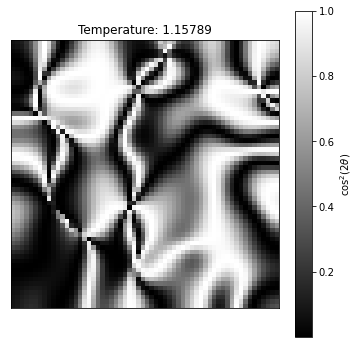

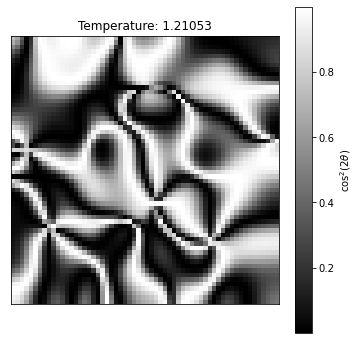

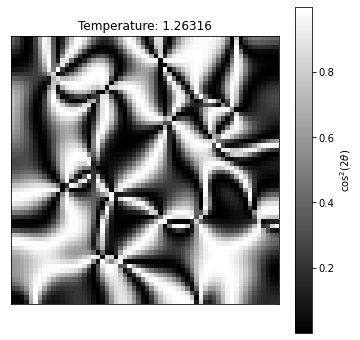

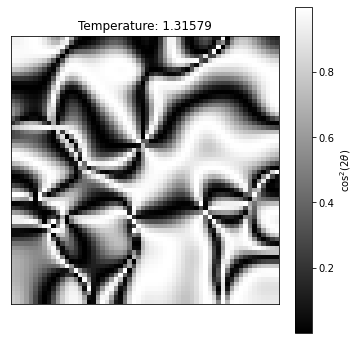

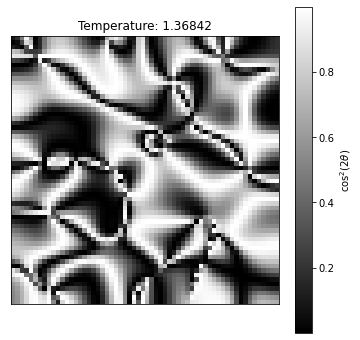

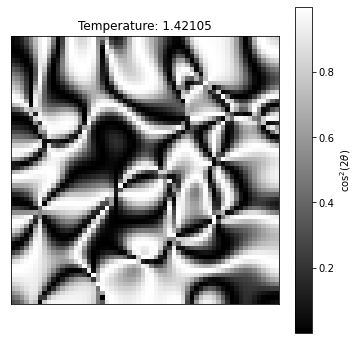

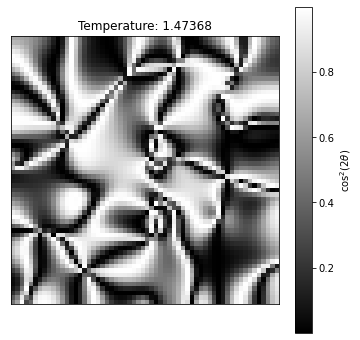

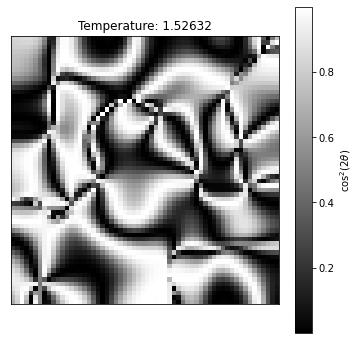

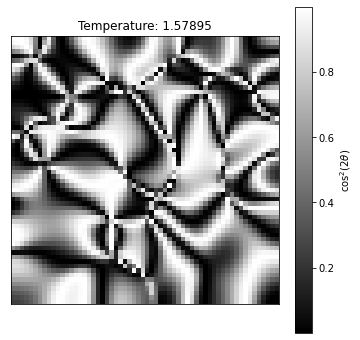

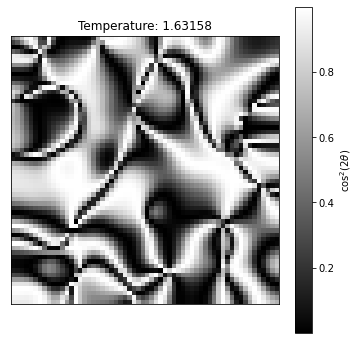

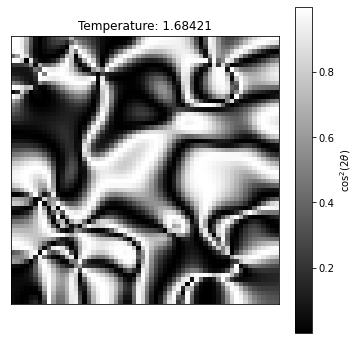

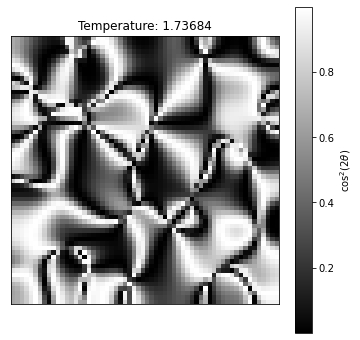

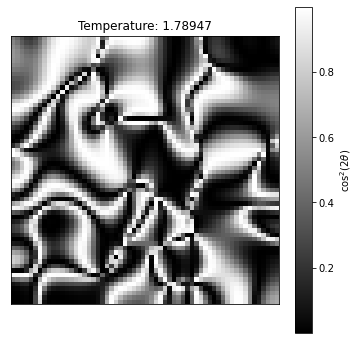

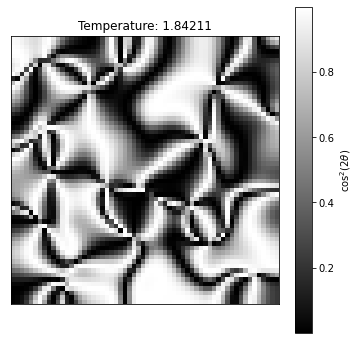

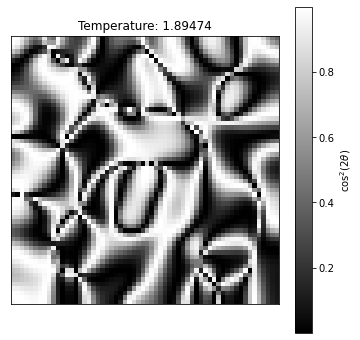

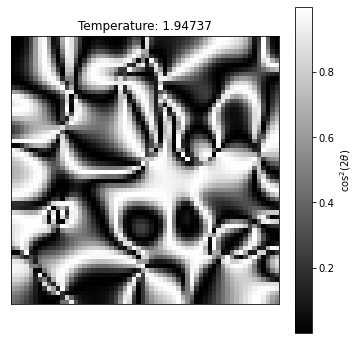

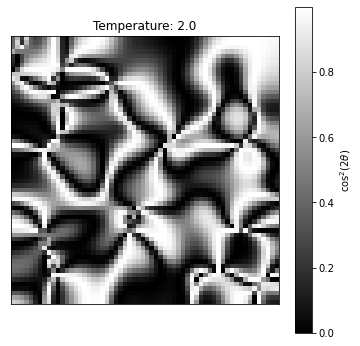

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import os

# Cargar y normalizar la configuración
def load_and_normalize_config(file_path):
    config = np.loadtxt(file_path)
    config = np.mod(config, 2 * np.pi)
    return config

# Cargar configuraciones desde un directorio
def load_configurations(directory, temperatures):
    configs = {}
    for temp in temperatures:
        temp_str = str(int(temp * 10000)).zfill(5)
        filename = os.path.join(directory, f'configatT={temp_str}.data')
        configs[temp] = load_and_normalize_config(filename)
    return configs

# Interpolar la configuración usando un filtro gaussiano
def interpolate_config(config, L, sigma=4.0):
    config_x = np.cos(config)
    config_y = np.sin(config)
    smooth_x = gaussian_filter(config_x, sigma=sigma)
    smooth_y = gaussian_filter(config_y, sigma=sigma)
    smooth_config = np.arctan2(smooth_y, smooth_x)
    return smooth_config

# Calcular cos^2(2*theta)
def calculate_cos2_2theta(config):
    return np.cos(2 * config) ** 2

# Plotear la configuración en escala de grises
def plot_cos2_2theta_configurations(configs, temperatures, L):
    for temp in temperatures:
        config = configs[temp].reshape(L, L)
        smoothed_config = interpolate_config(config, L)
        cos2_2theta = calculate_cos2_2theta(smoothed_config)

        plt.figure(figsize=(6, 6))
        plt.imshow(cos2_2theta, cmap='gray', origin='lower')
        plt.colorbar(label=r'$\cos^2(2\theta)$')
        plt.title(f'Temperature: {temp}')
        plt.xticks([])
        plt.yticks([])
        plt.savefig(f'cos2_2theta_temp_{int(temp*10000)}.pdf')
        plt.show()

# Cargar temperaturas desde el archivo de salida del procesamiento de datos
def load_temperatures(file_path):
    data = np.loadtxt(file_path)
    return data  # Suponiendo que las temperaturas están al final del archivo, después de los tres primeros valores

# Función principal en el notebook
def main():
    # Cargar el rango de temperaturas desde el archivo 'variables.data'
    temp_file_path = 'C:\\Users\\Usuario\\OneDrive\\Escritorio\\Cosas TFG\\transicionL=60\\variables.data'  # Cambia esta ruta según sea necesario
    temperatures = load_temperatures(temp_file_path)
    L = 60

    dir1 = 'C:\\Users\\Usuario\\OneDrive\\Escritorio\\Cosas TFG\\transicionL=60'

    configs = load_configurations(dir1, temperatures)

    plot_cos2_2theta_configurations(configs, temperatures, L)

# Ejecutar la función principal en el notebook
main()


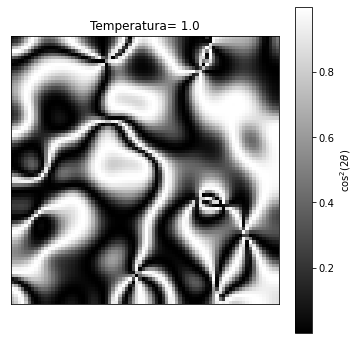

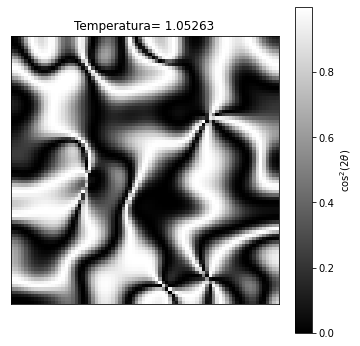

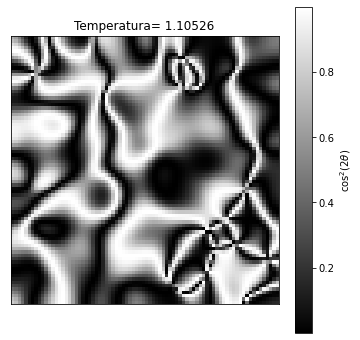

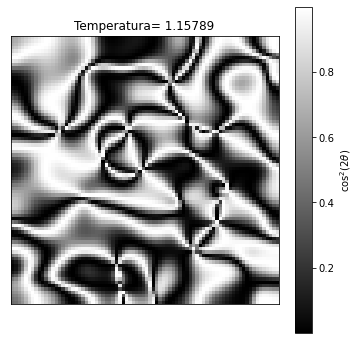

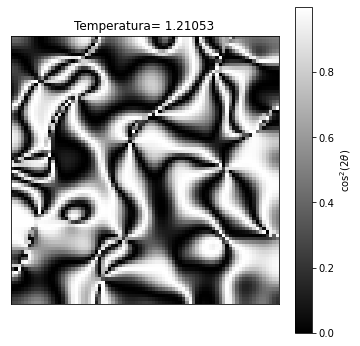

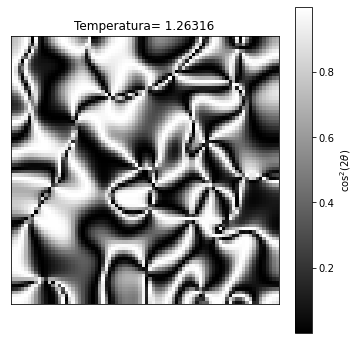

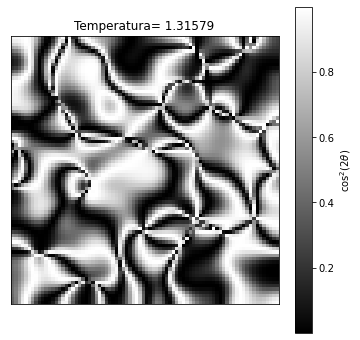

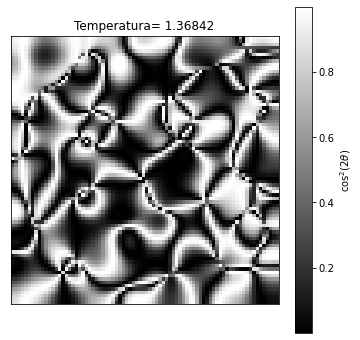

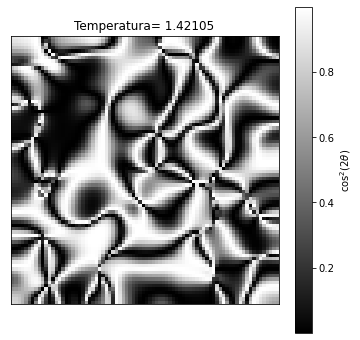

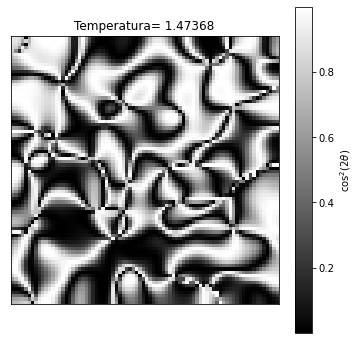

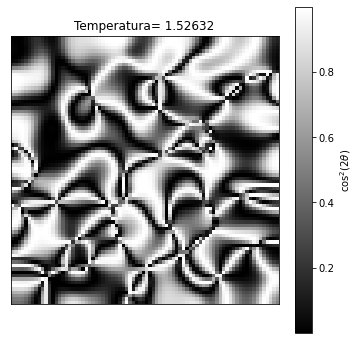

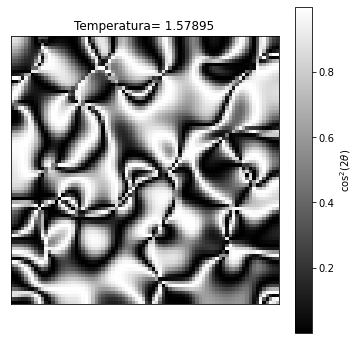

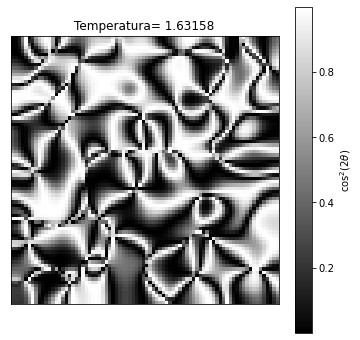

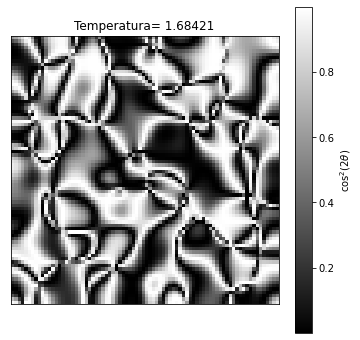

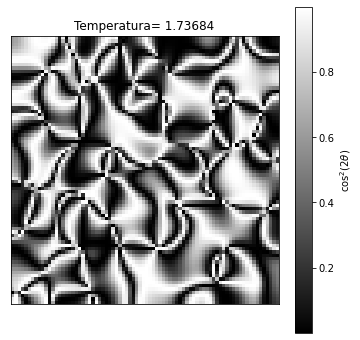

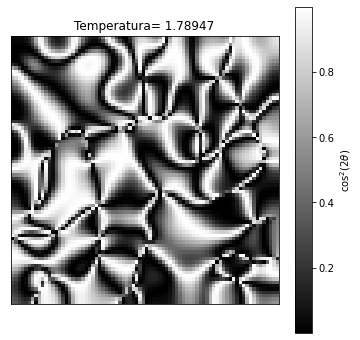

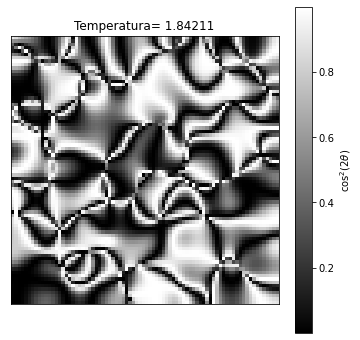

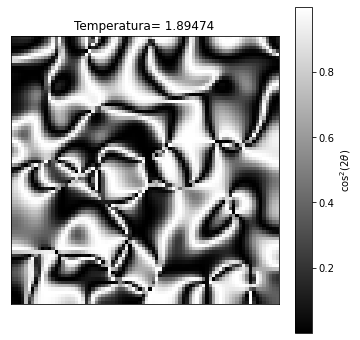

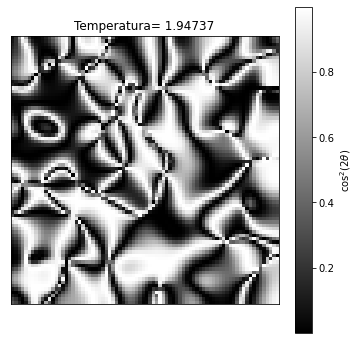

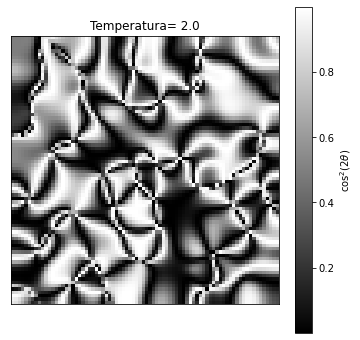

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import os

# Cargar y normalizar la configuración
def load_and_normalize_config(file_path):
    config = np.loadtxt(file_path)
    config = np.mod(config, 2 * np.pi)
    return config

# Cargar configuraciones desde un directorio
def load_configurations(directory, temperatures):
    configs = {}
    for temp in temperatures:
        temp_str = str(int(temp * 10000)).zfill(5)
        filename = os.path.join(directory, f'configatT={temp_str}.data')
        configs[temp] = load_and_normalize_config(filename)
    return configs

# Interpolar la configuración usando un filtro gaussiano
def interpolate_config(config, L, sigma=4.0):
    config_x = np.cos(config)
    config_y = np.sin(config)
    smooth_x = gaussian_filter(config_x, sigma=sigma)
    smooth_y = gaussian_filter(config_y, sigma=sigma)
    smooth_config = np.arctan2(smooth_y, smooth_x)
    return smooth_config

# Calcular cos^2(2*theta)
def calculate_cos2_2theta(config):
    return np.cos(2 * config) ** 2

# Plotear la configuración en escala de grises
def plot_cos2_2theta_configurations(configs, temperatures, L):
    for temp in temperatures:
        config = configs[temp].reshape(L, L)
        smoothed_config = interpolate_config(config, L)
        cos2_2theta = calculate_cos2_2theta(smoothed_config)

        plt.figure(figsize=(6, 6))
        plt.imshow(cos2_2theta, cmap='gray', origin='lower')
        plt.colorbar(label=r'$\cos^2(2\theta)$')
        plt.title(f'Temperatura= {temp}')
        plt.xticks([])
        plt.yticks([])
        plt.savefig(f'cos2_2theta_temp_{int(temp*10000)}.pdf')
        plt.show()

# Cargar temperaturas desde el archivo de salida del procesamiento de datos
def load_temperatures(file_path):
    data = np.loadtxt(file_path)
    return data  # Suponiendo que las temperaturas están al final del archivo, después de los tres primeros valores

# Función principal en el notebook
def main():
    # Cargar el rango de temperaturas desde el archivo 'variables.data'
    temp_file_path = 'C:\\Users\\Usuario\\OneDrive\\Escritorio\\Cosas TFG\\transicionL=80\\variables.data'  # Cambia esta ruta según sea necesario
    temperatures = load_temperatures(temp_file_path)
    L = 80

    dir1 = 'C:\\Users\\Usuario\\OneDrive\\Escritorio\\Cosas TFG\\transicionL=80'

    configs = load_configurations(dir1, temperatures)

    plot_cos2_2theta_configurations(configs, temperatures, L)

# Ejecutar la función principal en el notebook
main()


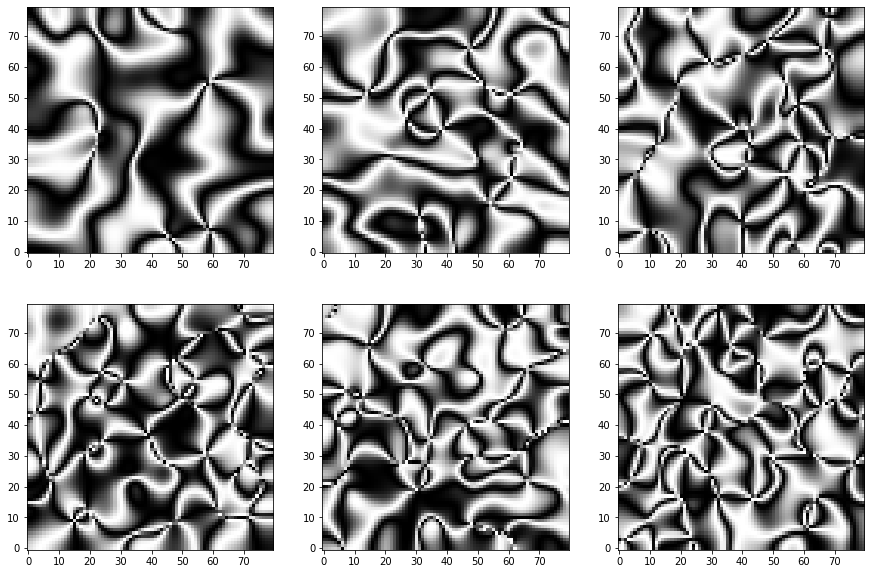

In [15]:
temp_file_path = 'C:\\Users\\Usuario\\OneDrive\\Escritorio\\Cosas TFG\\transicionL=80\\variables.data'  # Cambia esta ruta según sea necesario
temperatures = np.array([1.05263, 1.15789, 1.26316, 1.36842, 1.47368, 1.73684])
L = 80

dir1 = 'C:\\Users\\Usuario\\OneDrive\\Escritorio\\Cosas TFG\\transicionL=80'

configs = load_configurations(dir1, temperatures)

fig, axes=plt.subplots(2,3,figsize=(15,10))

for i,temp in enumerate(temperatures):
    config = configs[temp].reshape(L, L)
    smoothed_config = interpolate_config(config, L)
    cos2_2theta = calculate_cos2_2theta(smoothed_config)
    
    x=i // 3
    y=i % 3
    
    ax=axes[x,y]
    
    ax.imshow(cos2_2theta, cmap='gray', origin='lower')
    #ax.title(f'Temperatura= {temp}')
    #ax.xticks([])
    #ax.yticks([])
plt.savefig('cristalesliquidos.pdf')
    

    
    

In [7]:
4//4

1